In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import time


Choosing the value of `k`:

The algorithms performance can be sensitive the value of k. When k is small, the model is sensitive to noise and is prone to overfitting whereas large values of k can lead to underfitting, especially if there is class inbalance.
When the number of classes is 2, k should be an odd number to prevent any 'tied votes' when making predictions.
The value of k should be bigger than the number of classes for similar reasons.


In [234]:
data = pd.read_csv('./datasets/data.csv', index_col='id').reset_index(drop=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We'll remove the `Unnamed: 32` column

In [235]:
data = data.drop('Unnamed: 32', axis=1)

Check the shape

In [236]:
data.shape

(569, 31)

We'll use all the features available to predict the `diagnosis`

In [237]:
X = np.asarray(data.drop('diagnosis', axis=1).values.tolist())
y = np.asarray(data['diagnosis'].values.tolist())

In [238]:
# Converting the target to binary value
y = (y=='M').astype('int')
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [239]:
print("Shape of the X: ", X.shape)
print("Shape of the y: ", y.shape)

Shape of the X:  (569, 30)
Shape of the y:  (569,)


Splitting the data into training and testing data

In [240]:
def train_test_split(X: np.ndarray, y: np.ndarray, test_size=.2, random_state=0):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    data_test_size = int(X.shape[0] * test_size)
    
    X_train = X[indices[:-data_test_size]]
    X_test = X[indices[-data_test_size:]]
    y_train = y[indices[:-data_test_size]]
    y_test = y[indices[-data_test_size:]]

    
    return X_train, y_train, X_test, y_test

In [241]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Making the model

In [242]:
class KNN:
    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p
        
        self.X_train = None
        self.y_train = None
    
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1 - v2) ** 2))
    
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1 - v2))
    
    def minkowski(self, v1, v2, p=2):
        return np.sum(np.abs(v1 - v2) ** p) ** (1 / p)
        
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        # There are no training in the KNN model, the training data will be used to calculate the predictions
        self.X_train = X_train
        self.y_train = y_train
        
    # Make predictions
    def predict(self, X_test: np.ndarray):
        preds = list()
        
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            majority = stats.mode(nearest_neighbours)[0] # Get the majority
            preds.append(majority)
        
        return np.array(preds)
    
    def get_neighbours(self, test_row: np.ndarray):
        distances = list()
        
        for (train_row, train_class) in zip(self.X_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_row, test_row)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_row, test_row)
            elif self.metric=='minkowski':
                dist = self.minkowski(train_row, test_row, self.p)
            else:
                raise NameError('Metric not supported')
            distances.append((dist, train_class))
            
        # Sort distances in ascending order
        distances.sort(key=lambda x: x[0])
        
        # Identify k nearest neighbours
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])
            
        return neighbours


Evaluating model

In [243]:
def calc_accuracy(y_pred, y_true):
    calc_accuracy = (y_pred == y_true).mean()
    return calc_accuracy * 100 # Get the percentage

for metric in ['euclidean', 'manhattan', 'minkowski']:
    model = KNN(k=5, metric=metric, p=2)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f'Metric: {metric}, accuracy: {calc_accuracy(preds, y_test):.3f} %')


Metric: euclidean, accuracy: 93.805 %
Metric: manhattan, accuracy: 94.690 %
Metric: minkowski, accuracy: 93.805 %


`k` effect on the accuracy and time

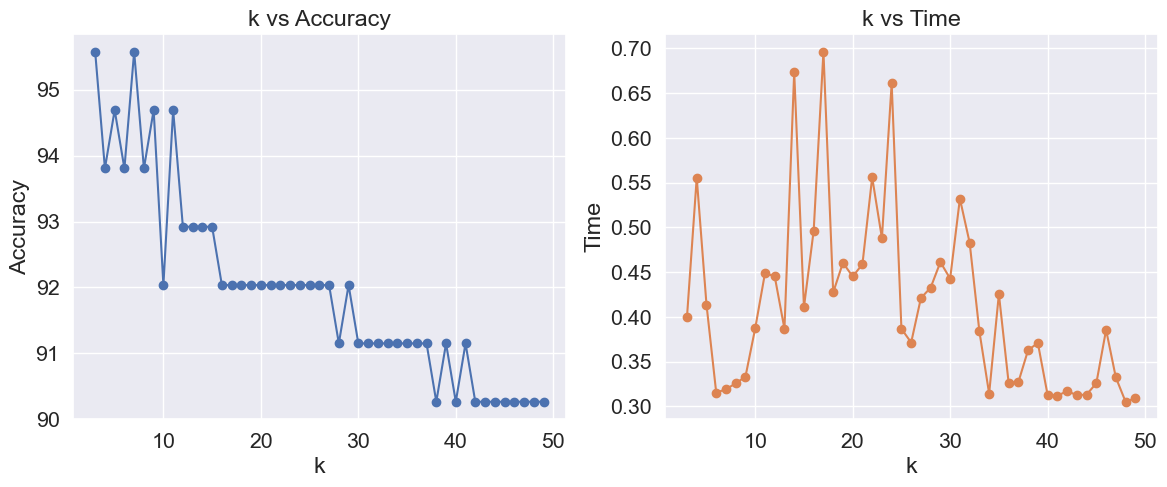

In [244]:
max_k = 50
times = list()
accuracies = list()

for k in range(3, max_k):
    model = KNN(k=k, metric='manhattan')
    model.fit(X_train, y_train)
    
    start_time = time.time()
    preds = model.predict(X_test)
    stop_time = time.time()
    
    accuracy = calc_accuracy(preds, y_test)
    accuracies.append(accuracy)
    times.append(stop_time - start_time)
    

plt.figure(figsize=(14, 5)) # 14 inches x 5 inches

plt.subplot(1, 2, 1) # 1 row x 2 columns, 1st position
plt.plot(range(3, max_k), accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')

plt.subplot(1, 2, 2) # # 1 row x 2 columns, 2nd position
plt.plot(range(3, max_k), times, marker='o', c='C1')
plt.xlabel('k')
plt.ylabel('Time')
plt.title('k vs Time')

plt.show()

Conclusion:

- The accuracy of the predictions are higher for smaller values of `k` than for larger values of `k`
- Time does not affected by the value of `k`

Now we'll check the effect `p` has on either the accuracy or the runtime

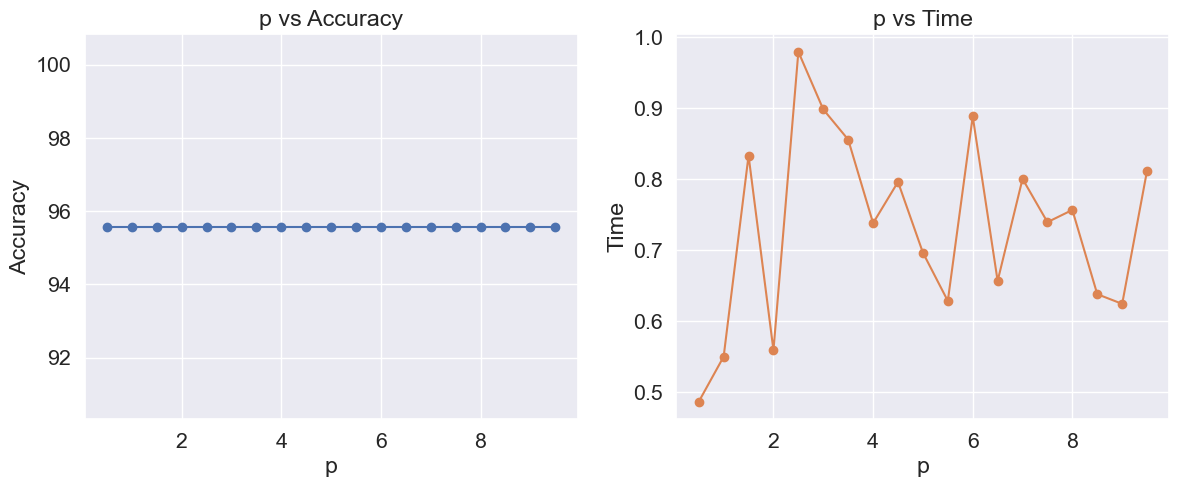

In [245]:
p_collections = np.arange(0.5, 10, 0.5)
times = list()
accuracies = list()

for p in p_collections:
    model = KNN(metric='minkowski', p=p)
    model.fit(X_train, y_train)
    
    start_time = time.time()
    preds = model.predict(X_test)
    stop_time = time.time()
    
    accuracy = calc_accuracy(preds, y_test)
    accuracies.append(accuracy)
    times.append(stop_time - start_time)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1) # 1 row x 2 columns, 1st position
plt.plot(p_collections, accuracies, marker='o')
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.title('p vs Accuracy')

plt.subplot(1, 2, 2) # # 1 row x 2 columns, 2nd position
plt.plot(p_collections, times, marker='o', c='C1')
plt.xlabel('p')
plt.ylabel('Time')
plt.title('p vs Time')

plt.show()

Conclusions:

- The value of `p` does not affect the accuracy
- The time are completely independent of the value of `p`